# Data Story

In [19]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns

In [20]:
# Read datasets that will be used for the plots!
interpolated_data = pd.read_csv('interpolated_penguin_data.csv')

## Correlation between global warming and melting icebergs

In [21]:
# Kristal

## Correlation between melting icebergs and rising sea levels

In [22]:
# Kristal

## Correlation between melting icebergs and penguin count

In [23]:
# Iliass

## Correlation between rising sea levels and number of penguins

In [24]:
total_penguin_2020 = interpolated_data[interpolated_data['year'] == 2020].\
    groupby('common_name')['penguin_count'].sum()
print(total_penguin_2020)


fig = go.Figure()
fig.add_trace(go.Pie(
    labels=total_penguin_2020.index,
    values=total_penguin_2020,
    textinfo='label+percent',
    textposition='outside',
    marker=dict(colors=px.colors.qualitative.T10),
    hole=0.8
))

fig.update_layout(
    title="The Amount of Penguin Species",
    showlegend=False,
    height=600
)

fig.show()

common_name
adelie penguin       4.329383e+06
chinstrap penguin    1.086566e+06
emperor penguin      2.697415e+05
gentoo penguin       1.524690e+05
king penguin         9.000000e+00
macaroni penguin     2.028333e+03
Name: penguin_count, dtype: float64


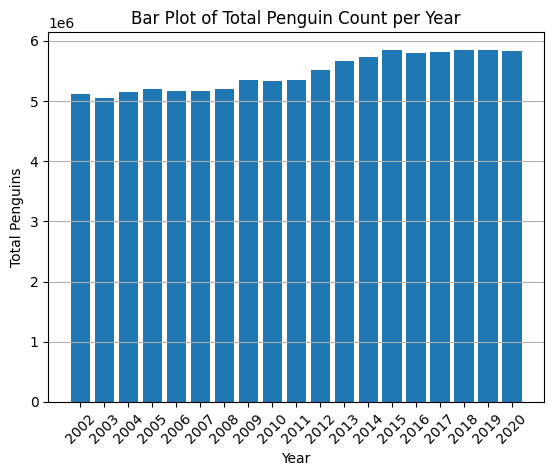

In [14]:
penguin_total = interpolated_data.groupby('year')['penguin_count'].sum()
plt.bar(penguin_total.index, penguin_total)
plt.xlabel('Year')
plt.ylabel('Total Penguins')
plt.title('Bar Plot of Total Penguin Count per Year')
plt.xticks(penguin_total.index, rotation=45)
plt.grid(axis='y')
plt.show()

## Correlation between rising sea levels and number of Gentoo penguins

In [15]:
# Judith

## Correlation between rising sea levels and number of Emperor penguins

In [2]:
# Judith